## Top movie analysis

In this project, I analyze the IMDb Top 1000 Movies dataset to explore trends in highly-rated films.
The goal is to uncover insights such as:

- Movies released per year
- Top movie genres
- Top movies with the most votes
- Movies per Genre vs. Average Rating
- Genre popularity over time
- Genre Breakdown by Rating Range

I've used libraries such as pandas, pyplot and seaborn

In [6]:
#imported libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="darkgrid")

In [8]:
df = pd.read_csv('imdb_top_1000.csv')
#dataframe is from kaggle, url is = https://www.kaggle.com/datasets/harshitshankhdhar/imdb-dataset-of-top-1000-movies-and-tv-shows?resource=download
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [39]:
#making sure we have the right data and that it is the right type
df['Released_Year'] = pd.to_datetime(df['Released_Year'], errors='coerce')
df['IMDB_Rating'] = df['IMDB_Rating'].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 713 entries, 0 to 997
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Poster_Link    713 non-null    object        
 1   Series_Title   713 non-null    object        
 2   Released_Year  713 non-null    datetime64[ns]
 3   Certificate    713 non-null    object        
 4   Runtime        713 non-null    object        
 5   Genre          713 non-null    object        
 6   IMDB_Rating    713 non-null    int32         
 7   Overview       713 non-null    object        
 8   Meta_score     713 non-null    float64       
 9   Director       713 non-null    object        
 10  Star1          713 non-null    object        
 11  Star2          713 non-null    object        
 12  Star3          713 non-null    object        
 13  Star4          713 non-null    object        
 14  No_of_Votes    713 non-null    int64         
 15  Gross          713 non-null 

In [41]:
#data cleaning. The original dataFrame had some missing values, so we erased any rows with missing values 
print(df.isnull().sum())
df = df.dropna(subset=['Released_Year'])
df = df.dropna(subset=['Certificate'])
df = df.dropna(subset=['Meta_score'])
df = df.dropna(subset=['Gross'])


Poster_Link      0
Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
genre_list       0
dtype: int64


In [14]:
#in order to be able to use Genre as a variable, we create a new column where the genres are in a list instead of a string
df['genre_list'] = df['Genre'].apply(lambda x: x.split(', ') if pd.notnull(x) else [])
df[['Series_Title', 'genre_list']].head()

,Series_Title,genre_list
0,The Shawshank Redemption,[Drama]
1,The Godfather,"[Crime, Drama]"
2,The Dark Knight,"[Action, Crime, Drama]"
3,The Godfather: Part II,"[Crime, Drama]"
4,12 Angry Men,"[Crime, Drama]"


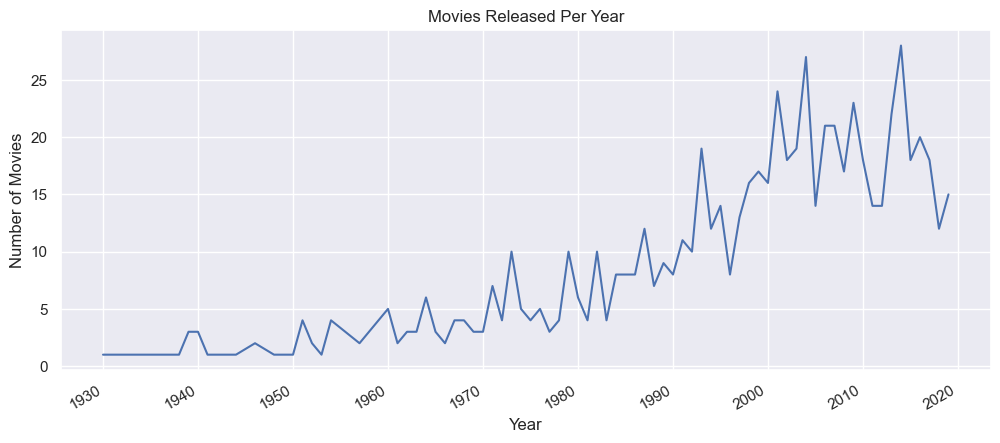

In [43]:
#Movies released per year
plt.figure(figsize=(12, 5))
df['Released_Year'].value_counts().sort_index().plot()
plt.title('Movies Released Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

**Conclusions**:  Most top rated movies were made in the 2000s, highlighting an era of technological advances in cinematography, especially with the rise of digital filmmaking, the revival of popular genres and the making of blockbusters franchises, among others


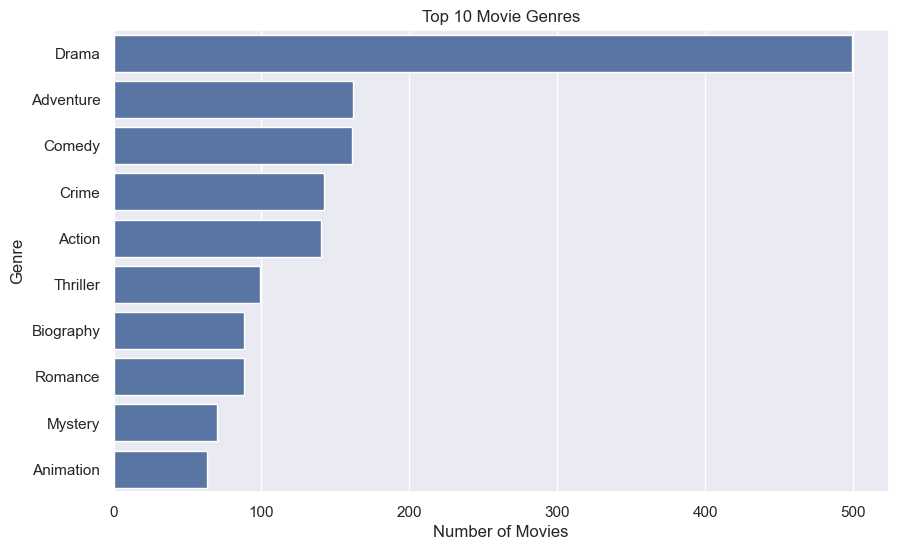

In [30]:

plt.figure(figsize=(10, 6))
sns.barplot(
    x=genre_counts.values[:10],
    y=genre_counts.index[:10],
)
plt.title("Top 10 Movie Genres")
plt.xlabel("Number of Movies")
plt.ylabel("Genre")
plt.show()

**Conclusions**:  Most of the top rated movies are considered drama movies. This can be due the complexity of characters and stories in this genre and how humans relate to these elements. 


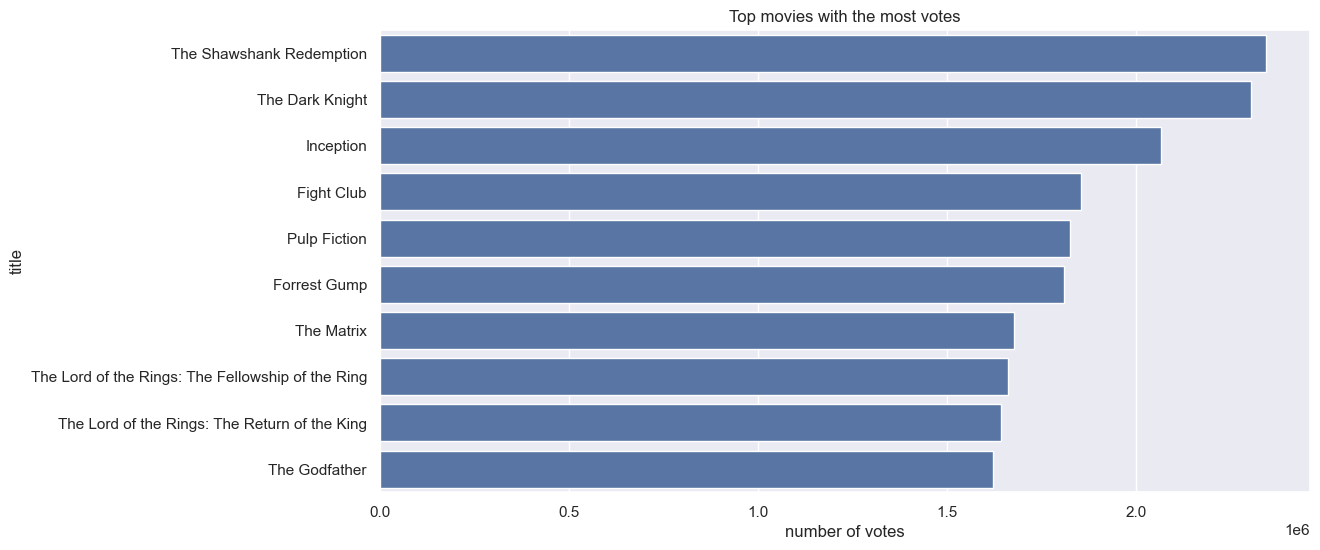

In [87]:
#top movies based on number of votes. Usually, more people voting means the score that the movie received is more accurate
top_movies_by_votes = df[['Series_Title', 'No_of_Votes']].sort_values(by='No_of_Votes', ascending=False).head(10)
plt.figure(figsize=(12,6))
sns.barplot(x='No_of_Votes', y='Series_Title', data=top_movies_by_votes)
plt.title("Top movies with the most votes")
plt.xlabel('number of votes')
plt.ylabel('title')
plt.show()

**Conclusions**: As we can see here, the movie with most votes is The Shawshank Redemption. Other movies with a big number of votes include The Dark knigt, Fight Club and the Matrix among others. I've analyzed the information of each of these movies and saw that the majority are classified as Drama movies. Other genres mentioned are action and crime. These are genres that a lot of people tend to like.

In [ ]:
#here, you can check the info of all of the movies above, used to describe the conclusions made
movie_info = df[df['Series_Title'] == 'The Shawshank Redemption']
movie_info1 = df[df['Series_Title'] == 'The Dark Knight']
movie_info2 = df[df['Series_Title'] == 'Inception']
movie_info3 = df[df['Series_Title'] == 'Fight Club']
movie_info4 = df[df['Series_Title'] == 'Pulp Fiction']
movie_info5 = df[df['Series_Title'] == 'Forrest Gump']
movie_info6 = df[df['Series_Title'] == 'The Matrix']
movie_info7 = df[df['Series_Title'] == 'The Lord of the Rings: The Fellowship of the Ring']
movie_info8 = df[df['Series_Title'] == 'The Lord of the Rings: The Return of the King']
movie_info9 = df[df['Series_Title'] == 'The Godfather']

movie_info5

<Figure size 1000x600 with 0 Axes>

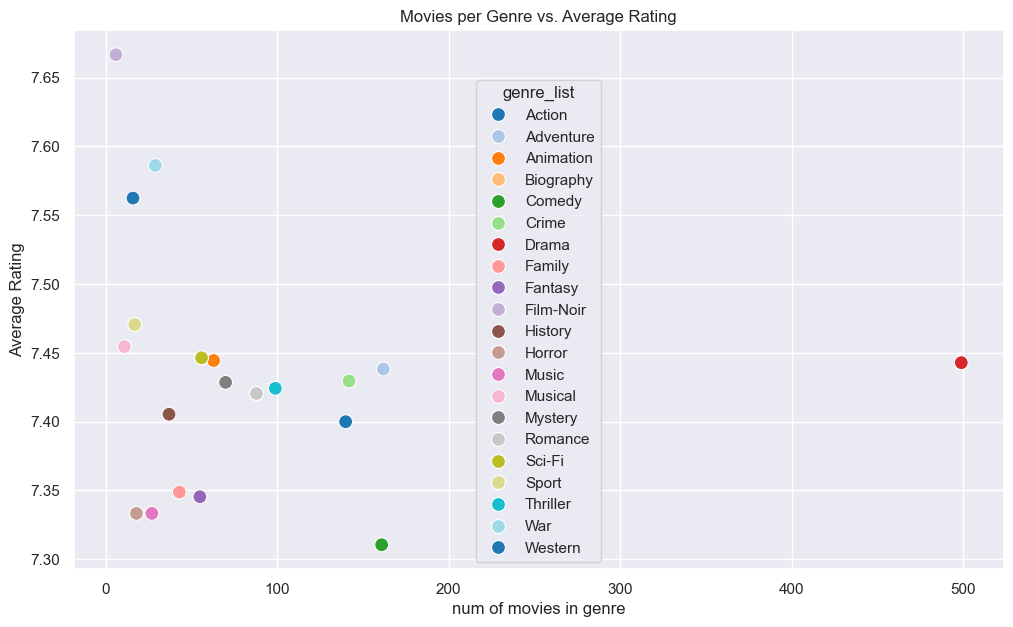

In [94]:
genre_rating_count = df.explode('genre_list').groupby('genre_list').agg(
    count=('Series_Title', 'size'),
    avg_rating=('IMDB_Rating', 'mean')
).reset_index()

plt.figure(figsize=(10,6))
plt.figure(figsize=(12,7))
sns.scatterplot(x='count', y='avg_rating', data=genre_rating_count, hue='genre_list', palette='tab20', s=100)
plt.title("Movies per Genre vs. Average Rating")
plt.xlabel('num of movies in genre')
plt.ylabel('Average Rating')
plt.show()

**Conclusions**: On average, film-noir (which is a genre characterized by a dark and cynical tone, popular during the 40s and 50s) has the highest rating, followed by Adventure and Action. These are also movie genres that appear less in the top ratings. Drama seems to have an average rating of 7.44, which, if taken into account that there are close to 500 drama movies on this list, makes it the most well rated genre.

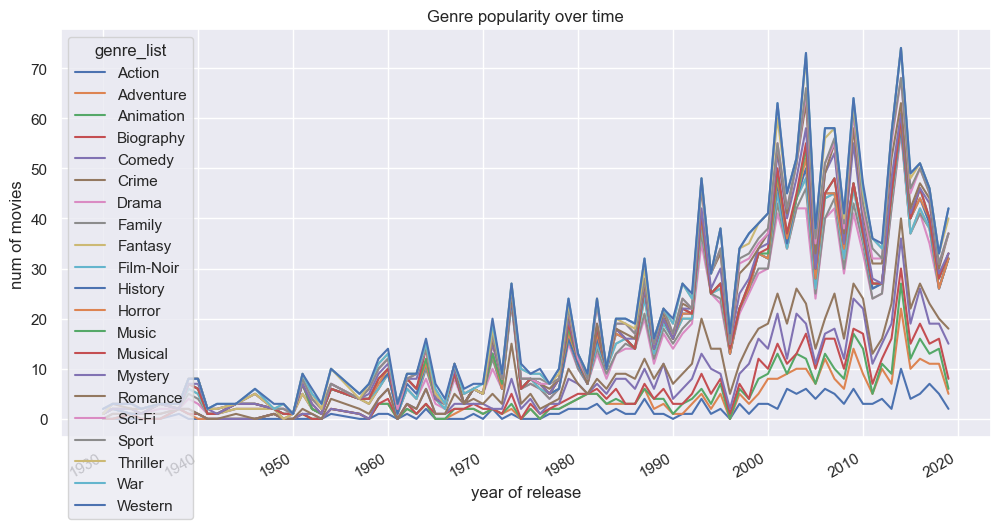

In [36]:
genre_popularity_over_time = df.explode('genre_list').groupby(['Released_Year', 'genre_list']).size().unstack().fillna(0)
genre_popularity_over_time.plot(figsize=(12, 6), stacked=True)
plt.title('Genre popularity over time')
plt.xlabel('year of release')
plt.ylabel('num of movies')
plt.show()

**Conclusions**:  Most of the movie genres seem to have increased in the top ratings over the last few years. This means more of each genre has made it into the top rated movies in IMDB. Though, some increased at a higher rate than others

C:\Users\hsak2\AppData\Local\Temp\ipykernel_10424\2358118513.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  rating_by_genre = df_exploded.groupby(['rating_range', 'genre_list']).size().unstack().fillna(0)


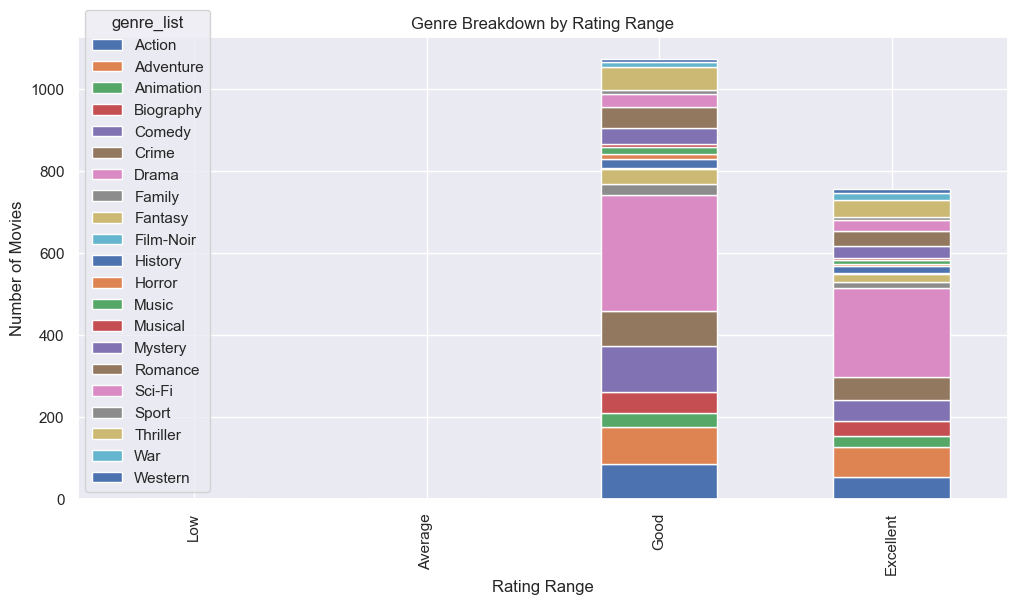

In [34]:
df_exploded = df.explode('genre_list')

df_exploded['rating_range'] = pd.cut(df_exploded['IMDB_Rating'], bins=[0, 3, 5, 7, 10],
                                     labels=['Low', 'Average', 'Good', 'Excellent'])

rating_by_genre = df_exploded.groupby(['rating_range', 'genre_list']).size().unstack().fillna(0)

# Plot
rating_by_genre.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Genre Breakdown by Rating Range")
plt.xlabel("Rating Range")
plt.ylabel("Number of Movies")
plt.show()


**Conclusions**: As seen in this graphic, one of the most notable things is that there are more movies with a good grade rather than an excellent grade. This can be seen if broken down into individual genders as well

# General conclusions:

- Drama is the most dominant genre among the top 1000 movies, followed by Action and Comedy, showing a strong preference for emotionally impactful films.
- Genres like Documentary and Film-Noir have fewer movies but tend to have high average ratings, suggesting niche but critically appreciated content
- Movies with higher IMDb ratings often have a strong correlation with high vote counts, indicating that audience engagement tends to align with quality.
- Over the decades, there has been an increase in movie ratings and variety of genres, showing the evolution of cinema and audience preferences.